### Exercice 3 :  Classification Naive bayes et PCA 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# 1.	Affichez les 5 premières lignes du dataset
df = pd.read_csv("adult.data", header=None, na_values=" ?", skipinitialspace=True)
df.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# 2.	Combien de valeurs manquantes (NaN) y a-t-il dans chaque colonne
print(df.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64


In [51]:
# 3.	Combien de catégories uniques y a-t-il dans la colonne occupation avant encodage ? 
# assigner les noms de colonnes au df
columns = [ 'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income' ]
df.columns = columns
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [52]:
#Combien de catégories uniques y a-t-il dans la colonne occupation avant encodage ?
print('NOMBRE DE CATEGORIES UNIQUES :', df['occupation'].nunique())

NOMBRE DE CATEGORIES UNIQUES : 15


In [ ]:
# 4.	Après encodage avec LabelEncoder, quelles sont les valeurs possibles pour la série sex ? (0 et 1 : que représentent-ils ?)

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

# Affichage des correspondances pour la série sex
for val in df['sex'].unique():
    label = le.inverse_transform([val])[0]
    print(f"{label} correspond à la valeur encodée {val}")

Male correspond à la valeur encodée 1
Female correspond à la valeur encodée 0


In [ ]:
# 5.	Quelle est l’accuracy du modèle sans PCA ? (Arrondir à 3 décimales)
X = df.drop('income', axis=1)
y = df['income']    
# transformer les variables catégorielles en variables numériques avec LabelEncoder (une seule colonne par variable)
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
# afficher les colonnes de x avec les valeurs catégorielles encodées
X.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f"Accuracy du modèle sans PCA : {accuracy:.3f}")  

Accuracy du modèle sans PCA : 0.862


In [ ]:
# 6.	 Quelle proportion de variance est expliquée par chaque composante principale ?
pca = PCA()
pca.fit(X)
explained_variance = pca.explained_variance_ratio_
for i, var in enumerate(explained_variance):
    print(f"Composante principale {i+1}: {var:.4%} de la variance expliquée")


Composante principale 1: 99.5114% de la variance expliquée
Composante principale 2: 0.4872% de la variance expliquée
Composante principale 3: 0.0014% de la variance expliquée
Composante principale 4: 0.0000% de la variance expliquée
Composante principale 5: 0.0000% de la variance expliquée
Composante principale 6: 0.0000% de la variance expliquée
Composante principale 7: 0.0000% de la variance expliquée
Composante principale 8: 0.0000% de la variance expliquée
Composante principale 9: 0.0000% de la variance expliquée
Composante principale 10: 0.0000% de la variance expliquée
Composante principale 11: 0.0000% de la variance expliquée
Composante principale 12: 0.0000% de la variance expliquée
Composante principale 13: 0.0000% de la variance expliquée
Composante principale 14: 0.0000% de la variance expliquée


- La composante principale 1 (PC1) explique le maximum de variance dans les données. Elle résume l'information la plus importante du dataset en une seule dimension.

In [ ]:
# 7.	Combien de variance totale est conservée avec 2 composantes ? (en %)
pca_2 = PCA(n_components=2)
pca_2.fit(X)
print(f'Variance expliquée par les 2 premières composantes :{np.sum(pca_2.explained_variance_ratio_):.4%}')

Variance expliquée par les 2 premières composantes :99.9985%


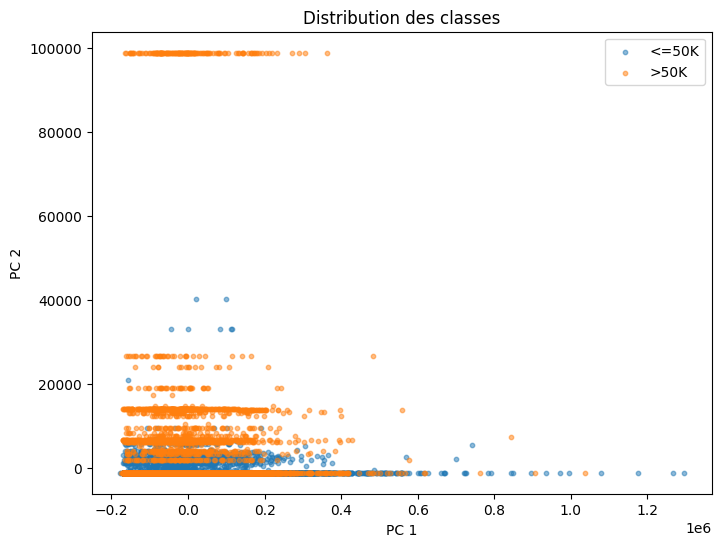

In [ ]:
# 8.	En traçant le graphique de distribution des valeurs pour la cible, les deux classes (≤50K et >50K) sont-elles bien séparées dans l’espace des 2 composantes ? Justifiez.

# Projeter X sur les 2 premières PCA
X_pca_2 = pca_2.transform(X)

# Afficher la distribution des classes
plt.figure(figsize=(8,6))
for classe in y.unique():
    idx = y == classe
    plt.scatter(X_pca_2[idx, 0], X_pca_2[idx, 1], label=classe, alpha=0.5, s=10)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Distribution des classes')
plt.legend()
plt.show()

- Les points orange (>50K) sont majoritairement concentrés sur des valeurs élevées de PC2, alors que les points bleus (<=50K) sont plus dispersés et souvent proches de zéro sur PC2.
- Sur l’axe PC1, la majorité des points sont regroupés vers les valeurs faibles, mais il y a quelques points orange et bleu qui s’étendent vers des valeurs plus élevées.
- Il existe une séparation partielle : les individus avec un revenu >50K ont tendance à avoir des valeurs plus élevées sur PC2, ce qui permet de distinguer une partie des deux classes.
- Cependant, il y a aussi un chevauchement : certains points bleus et orange se retrouvent dans des zones similaires, surtout pour les faibles valeurs de PC2.
- Les classes ne sont pas parfaitement séparées dans l’espace des deux premières composantes principales, mais PC2 aide à distinguer les individus avec un revenu >50K.

In [69]:
# 9.	Quelle est l’accuracy du modèle avec PCA ?
X_pca_2 = pca_2.transform(X)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_2, y, test_size=0.2, random_state=42)
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
accuracy_pca = clf_pca.score(X_test_pca, y_test)
print(f"Accuracy du modèle avec PCA : {accuracy_pca:.3f}")

Accuracy du modèle avec PCA : 0.788


**10 - Comparez les deux accuracies (avec/sans PCA). La PCA a-t-elle amélioré ou dégradé la performance ? Expliquez pourquoi.**

- Accuracy du modèle sans PCA : 0.862
- Accuracy du modèle avec PCA (2 composantes) : 0.788

La PCA a dégradé la performance du modèle. En effet, en réduisant le nombre de variables à seulement deux composantes principales, une partie de l'information utile pour la classification a été perdue.

### Conclusion :

Dans ce cas, la PCA n'est pas utile pour améliorer la performance du modèle, car elle réduit trop l'information disponible pour la classification. La PCA est surtout bénéfique lorsque :
- Le jeu de données contient beaucoup de variables corrélées ou redondantes.
- On souhaite visualiser les données ou simplifier le modèle.
- On veut réduire le bruit ou éviter le surapprentissage (overfitting).